# (1) Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import graphviz 

from scipy import stats
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import tree
# from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import time
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# (2) Load Data

In [2]:
df = pd.read_csv('Lesson5_Loan_FallOut_Prediction.csv')
display(df.head(5))
display(df.tail(5))

,APPLICATION_NUM,AGE,SCHOOLING,GENDER,MARITAL,OCCUPY,DEPEND,BORROWER_CREDIT_SCORE,JUDGEMENTS,BANKRUPTCY,FORECLOSURE,LAWSUIT,ALIMONY,VETERAN,PAST_LOAN,INITIAL_RATE,FALLOUT_FLAG
0,1234567,62,14,Male,Married,Y,0,645.0,N,N,N,N,N,Y,N,4.25,0
1,1234568,71,12,Male,Married,Y,0,778.0,N,N,N,N,N,Y,N,4.99,0
2,1234569,28,16,Male,Married,Y,1,677.0,N,N,N,N,N,Y,N,4.49,0
3,1234570,62,20,Male,Married,Y,0,677.0,N,N,N,N,N,Y,N,4.25,0
4,1234571,38,12,Not provided by phone/mail app,Unmarried,Y,0,602.0,N,N,N,N,N,Y,N,4.25,0


,APPLICATION_NUM,AGE,SCHOOLING,GENDER,MARITAL,OCCUPY,DEPEND,BORROWER_CREDIT_SCORE,JUDGEMENTS,BANKRUPTCY,FORECLOSURE,LAWSUIT,ALIMONY,VETERAN,PAST_LOAN,INITIAL_RATE,FALLOUT_FLAG
58045,1292612,35,16,Male,Married,N,1,775.0,N,N,N,N,N,Y,N,3.25,1
58046,1292613,51,15,Male,Married,Y,0,NaN,N,N,N,N,N,Y,N,4.25,1
58047,1292614,28,13,Male,Unmarried,Y,2,NaN,N,N,N,N,N,N,N,4.25,1
58048,1292615,74,19,Female,Unmarried,Y,0,NaN,N,N,N,N,N,Y,N,4.49,1
58049,1292616,54,16,Male,Unmarried,Y,0,NaN,N,N,N,N,N,Y,N,4.49,1


# (3) Check on data quality & completeness
## check data completeness

In [3]:
df.isna().sum()

APPLICATION_NUM              0
AGE                          0
SCHOOLING                    0
GENDER                       0
MARITAL                      6
OCCUPY                       0
DEPEND                       0
BORROWER_CREDIT_SCORE    18055
JUDGEMENTS                   0
BANKRUPTCY                   0
FORECLOSURE                  0
LAWSUIT                      0
ALIMONY                      0
VETERAN                   7624
PAST_LOAN                    0
INITIAL_RATE                 0
FALLOUT_FLAG                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58050 entries, 0 to 58049
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   APPLICATION_NUM        58050 non-null  int64  
 1   AGE                    58050 non-null  int64  
 2   SCHOOLING              58050 non-null  int64  
 3   GENDER                 58050 non-null  object 
 4   MARITAL                58044 non-null  object 
 5   OCCUPY                 58050 non-null  object 
 6   DEPEND                 58050 non-null  int64  
 7   BORROWER_CREDIT_SCORE  39995 non-null  float64
 8   JUDGEMENTS             58050 non-null  object 
 9   BANKRUPTCY             58050 non-null  object 
 10  FORECLOSURE            58050 non-null  object 
 11  LAWSUIT                58050 non-null  object 
 12  ALIMONY                58050 non-null  object 
 13  VETERAN                50426 non-null  object 
 14  PAST_LOAN              58050 non-null  object 
 15  IN

input variables with missing values: MARITAL, BORROWER_CREDIT_SCORE, VETERAN

In [5]:
#identify numeric vs categorical variables
df.dtypes

APPLICATION_NUM            int64
AGE                        int64
SCHOOLING                  int64
GENDER                    object
MARITAL                   object
OCCUPY                    object
DEPEND                     int64
BORROWER_CREDIT_SCORE    float64
JUDGEMENTS                object
BANKRUPTCY                object
FORECLOSURE               object
LAWSUIT                   object
ALIMONY                   object
VETERAN                   object
PAST_LOAN                 object
INITIAL_RATE             float64
FALLOUT_FLAG               int64
dtype: object

categorical variables: GENDER, MARITAL, OCCUPY, JUDGEMENTS, BANKRUPTCY, FORECLOSURE, LAWSUIT, ALIMONY, VETERAN, PAST_LOAN<br>
dummy variables: FALLOUT_FLAG<br>
numeric variables: AGE, SCHOOLING, DEPEND, BORROWCREDIT_SCORE, INITIAL_RATE

In [6]:
cat_col_names = ['GENDER', 'MARITAL', 'OCCUPY', 'JUDGEMENTS', 'BANKRUPTCY', 'FORECLOSURE', 'LAWSUIT', 'ALIMONY', 'VETERAN', 'PAST_LOAN', 'FALLOUT_FLAG']
for i in cat_col_names:
    print(i, ':', df[i].unique())

GENDER : ['Male' 'Not provided by phone/mail app' 'Female']
MARITAL : ['Married' 'Unmarried' 'Separated' nan]
OCCUPY : ['Y' 'N']
JUDGEMENTS : ['N' 'Y']
BANKRUPTCY : ['N' 'Y']
FORECLOSURE : ['N' 'Y']
LAWSUIT : ['N' 'Y']
ALIMONY : ['N' 'Y']
VETERAN : ['Y' nan 'N']
PAST_LOAN : ['N' 'Y']
FALLOUT_FLAG : [0 1]


Missing VETERAN Samples


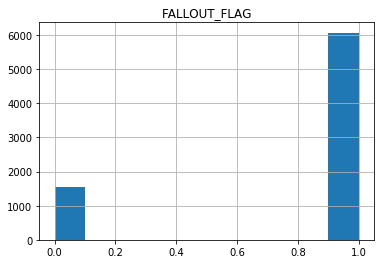

In [7]:
print('Missing VETERAN Samples')
df[df['VETERAN'].isna()].hist(column='FALLOUT_FLAG')
plt.show()

In [8]:
print('Missing BORROWER_CREDIT_SCORE Samples')
print(df[df['BORROWER_CREDIT_SCORE'].isna()]['FALLOUT_FLAG'].unique())
print('Missing MARITAL Samples')
print(df[df['MARITAL'].isna()]['FALLOUT_FLAG'].unique())

Missing BORROWER_CREDIT_SCORE Samples
[1]
Missing MARITAL Samples
[1]


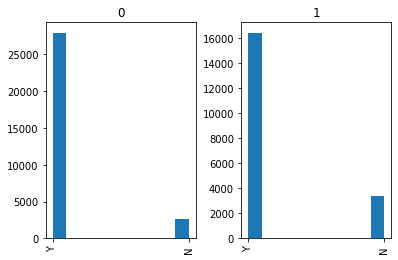

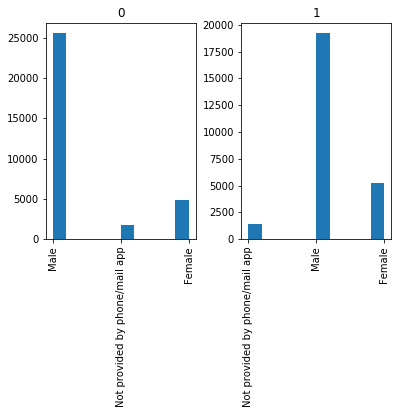

In [9]:
df.hist(by='FALLOUT_FLAG',column = 'VETERAN')
df.hist(by='FALLOUT_FLAG',column = 'GENDER')
plt.show()

# (4) Data Preprocessing

## Data Imputation

Input variables with missing values: MARITAL, BORROWER_CREDIT_SCORE, VETERAN<br>
1. MARITAL and VETERAN are categorical variables, we fill nan values with "Unknown" class
2. BORROWER_CREDIT_SCORE is numerical variable, if BORROWER_CREDIT_SCORE = nan, FALLOUT_FLAG = 1. We impute nan with -999.

In [10]:
values = {'MARITAL': "Unknown", 'VETERAN': "Unknown", 'BORROWER_CREDIT_SCORE': -999}
df.fillna(value=values, inplace=True)
df.isna().sum()

APPLICATION_NUM          0
AGE                      0
SCHOOLING                0
GENDER                   0
MARITAL                  0
OCCUPY                   0
DEPEND                   0
BORROWER_CREDIT_SCORE    0
JUDGEMENTS               0
BANKRUPTCY               0
FORECLOSURE              0
LAWSUIT                  0
ALIMONY                  0
VETERAN                  0
PAST_LOAN                0
INITIAL_RATE             0
FALLOUT_FLAG             0
dtype: int64

## Data Transformation

In [11]:
df.dtypes

APPLICATION_NUM            int64
AGE                        int64
SCHOOLING                  int64
GENDER                    object
MARITAL                   object
OCCUPY                    object
DEPEND                     int64
BORROWER_CREDIT_SCORE    float64
JUDGEMENTS                object
BANKRUPTCY                object
FORECLOSURE               object
LAWSUIT                   object
ALIMONY                   object
VETERAN                   object
PAST_LOAN                 object
INITIAL_RATE             float64
FALLOUT_FLAG               int64
dtype: object

categorical variables: GENDER, MARITAL, OCCUPY, JUDGEMENTS, BANKRUPTCY, FORECLOSURE, LAWSUIT, ALIMONY, VETERAN, PAST_LOAN<br>
dummy variables: FALLOUT_FLAG<br>
numeric variables: AGE, SCHOOLING, DEPEND, BORROWCREDIT_SCORE, INITIAL_RATE

In [12]:
# Transfer Catagorical variables into dummy variables
cat_col_names = ['GENDER', 'MARITAL', 'OCCUPY', 'JUDGEMENTS', 'BANKRUPTCY', 
                 'FORECLOSURE', 'LAWSUIT', 'ALIMONY', 'VETERAN', 'PAST_LOAN', 'FALLOUT_FLAG']
for i in cat_col_names:
    print(i, ':', df[i].unique())

GENDER : ['Male' 'Not provided by phone/mail app' 'Female']
MARITAL : ['Married' 'Unmarried' 'Separated' 'Unknown']
OCCUPY : ['Y' 'N']
JUDGEMENTS : ['N' 'Y']
BANKRUPTCY : ['N' 'Y']
FORECLOSURE : ['N' 'Y']
LAWSUIT : ['N' 'Y']
ALIMONY : ['N' 'Y']
VETERAN : ['Y' 'Unknown' 'N']
PAST_LOAN : ['N' 'Y']
FALLOUT_FLAG : [0 1]


In [13]:
df = pd.get_dummies(df.drop('APPLICATION_NUM', axis=1), drop_first=True)

In [14]:
display(df)

,AGE,SCHOOLING,DEPEND,BORROWER_CREDIT_SCORE,INITIAL_RATE,FALLOUT_FLAG,GENDER_Male,GENDER_Not provided by phone/mail app,MARITAL_Separated,MARITAL_Unknown,MARITAL_Unmarried,OCCUPY_Y,JUDGEMENTS_Y,BANKRUPTCY_Y,FORECLOSURE_Y,LAWSUIT_Y,ALIMONY_Y,VETERAN_Unknown,VETERAN_Y,PAST_LOAN_Y
0,62,14,0,645.0,4.25,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,71,12,0,778.0,4.99,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,16,1,677.0,4.49,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,62,20,0,677.0,4.25,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,38,12,0,602.0,4.25,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58045,35,16,1,775.0,3.25,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
58046,51,15,0,-999.0,4.25,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
58047,28,13,2,-999.0,4.25,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
58048,74,19,0,-999.0,4.49,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0


## Feature Engineering

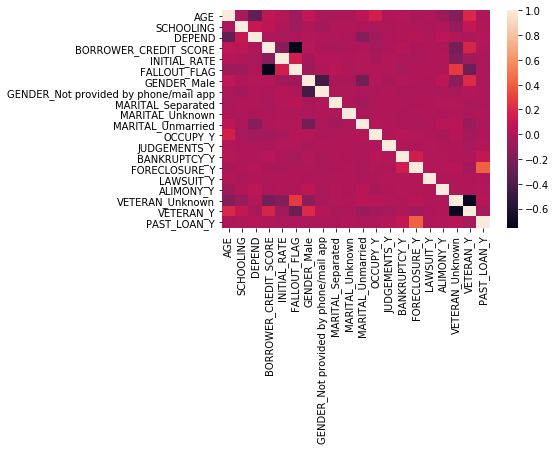

In [15]:
corr = df.corr()
sns.heatmap(corr)

From feature importance analysis below, BORROWER_CREDIT_SCORE and VETERAN_Y has much higher impotance than other features. <br>
So we generate synthetic features based on the above 2 features.<br>
from heatmap above, these 2 features are corrrelated.

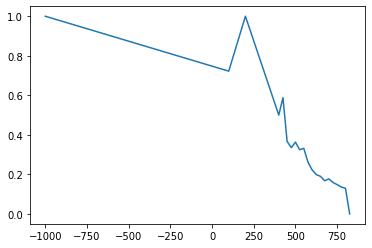

In [16]:
df_augmented = df.copy()
df_augmented['CREDIT_BUCKET'] = df['BORROWER_CREDIT_SCORE'] // 25 * 25
plt.plot(df_augmented[['CREDIT_BUCKET','FALLOUT_FLAG']].groupby(['CREDIT_BUCKET']).mean())

In [17]:
df_augmented[['CREDIT_BUCKET','FALLOUT_FLAG']].groupby(['CREDIT_BUCKET']).mean()

,FALLOUT_FLAG
CREDIT_BUCKET,
-1000.0,1.000000
100.0,0.722222
200.0,1.000000
400.0,0.500000
425.0,0.588235
450.0,0.366906
475.0,0.335165
500.0,0.363281
525.0,0.324733


In [18]:
df_augmented[['CREDIT_BUCKET', 'FALLOUT_FLAG']].groupby(['CREDIT_BUCKET']).count()

,FALLOUT_FLAG
CREDIT_BUCKET,
-1000.0,18055
100.0,18
200.0,7
400.0,2
425.0,17
450.0,139
475.0,364
500.0,768
525.0,1124


In [19]:
#plt.hist(df_augmented['CREDIT_BUCKET'])

We partition BORROWER_CREDIT_SCORE into groups based on its value range:<br>

In [20]:
df.loc[df['BORROWER_CREDIT_SCORE'] == -999, 'CREDIT_nan'] = 1
df.loc[(df['BORROWER_CREDIT_SCORE'] >= 0) & (df['BORROWER_CREDIT_SCORE'] <= 300), 'CREDIT_300'] = 1

In [21]:
for i in range(750, 875, 25):
    tempColumnName = "CREDIT_" + str(i)
    df.loc[(df['BORROWER_CREDIT_SCORE'] > (i - 25)) 
                  & (df['BORROWER_CREDIT_SCORE'] <= i), tempColumnName] = 1

In [22]:
df['CREDIT_SQUARE'] = df['BORROWER_CREDIT_SCORE'] * df['BORROWER_CREDIT_SCORE']
df['CREDIT_DEV'] = df['BORROWER_CREDIT_SCORE'] - df['BORROWER_CREDIT_SCORE'].mean()
df['CREDIT_TRI'] = df['BORROWER_CREDIT_SCORE'] * df['CREDIT_SQUARE']

In [23]:
df.fillna(value = 0, inplace = True)
df.isna().sum()

AGE                                      0
SCHOOLING                                0
DEPEND                                   0
BORROWER_CREDIT_SCORE                    0
INITIAL_RATE                             0
FALLOUT_FLAG                             0
GENDER_Male                              0
GENDER_Not provided by phone/mail app    0
MARITAL_Separated                        0
MARITAL_Unknown                          0
MARITAL_Unmarried                        0
OCCUPY_Y                                 0
JUDGEMENTS_Y                             0
BANKRUPTCY_Y                             0
FORECLOSURE_Y                            0
LAWSUIT_Y                                0
ALIMONY_Y                                0
VETERAN_Unknown                          0
VETERAN_Y                                0
PAST_LOAN_Y                              0
CREDIT_nan                               0
CREDIT_300                               0
CREDIT_750                               0
CREDIT_775 

# (5) Modeling
We first split the dataset into training set and testing set. And use 
1. Decision Tree
2. SVM
3. Logistic Regression  

to fit the model, then use this model to predict.

In [24]:
X = df.drop('FALLOUT_FLAG',axis=1)
y = df['FALLOUT_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Decision Tree

### Prediction and Validation

In [25]:
start_dt = time.time()
parameters = {'min_samples_split':[50,100,200,300,400,500]}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=1),parameters,scoring='f1_weighted',cv=10,n_jobs=-1)
clf.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_dt))

--- 4.806262254714966 seconds ---


In [26]:
clf.cv_results_['mean_test_score']

array([0.8585033 , 0.8654376 , 0.8689433 , 0.86974276, 0.87072298,
       0.87099468])

In [27]:
# Decision Tree
DTclf = tree.DecisionTreeClassifier(min_samples_split=100).fit(X_train, y_train)
y_pred_DT = DTclf.predict(X_test)

In [28]:
print(metrics.classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6391
           1       0.93      0.76      0.84      5219

    accuracy                           0.87     11610
   macro avg       0.88      0.86      0.86     11610
weighted avg       0.88      0.87      0.87     11610



In [29]:
#threshold modification
y_myprediction = (DTclf.predict_proba(X_test) >= 0.2).astype(int)
y_myprediction = y_myprediction[:,1]
print(metrics.classification_report(y_test,y_myprediction))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      6391
           1       0.69      0.87      0.77      5219

    accuracy                           0.76     11610
   macro avg       0.78      0.77      0.76     11610
weighted avg       0.79      0.76      0.76     11610



In [30]:
#threshold modification
y_myprediction = (DTclf.predict_proba(X_test) >= 0.1).astype(int)
y_myprediction = y_myprediction[:,1]
print(metrics.classification_report(y_test,y_myprediction))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54      6391
           1       0.55      0.93      0.69      5219

    accuracy                           0.63     11610
   macro avg       0.71      0.66      0.62     11610
weighted avg       0.73      0.63      0.61     11610



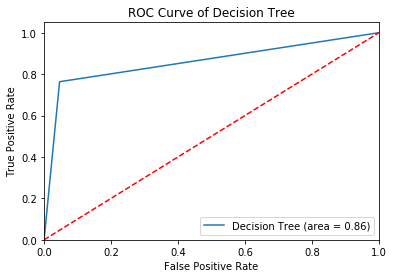

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_DT, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % metrics.roc_auc_score(y_test, y_pred_DT))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.legend(loc="lower right")
plt.show()

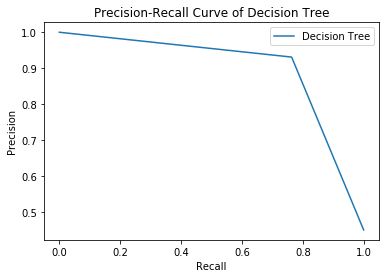

In [32]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_DT)
plt.figure()
plt.plot(recall, precision, label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve of Decision Tree")
plt.legend()
plt.show()

Feature: 0, Score: 0.00723
Feature: 1, Score: 0.00233
Feature: 2, Score: 0.00160
Feature: 3, Score: 0.88961
Feature: 4, Score: 0.00701
Feature: 5, Score: 0.00006
Feature: 6, Score: 0.00013
Feature: 7, Score: 0.00219
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00051
Feature: 10, Score: 0.00075
Feature: 11, Score: 0.00078
Feature: 12, Score: 0.00100
Feature: 13, Score: 0.00037
Feature: 14, Score: 0.00069
Feature: 15, Score: 0.00038
Feature: 16, Score: 0.00423
Feature: 17, Score: 0.05682
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00008
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00171
Feature: 27, Score: 0.01900
Feature: 28, Score: 0.00352


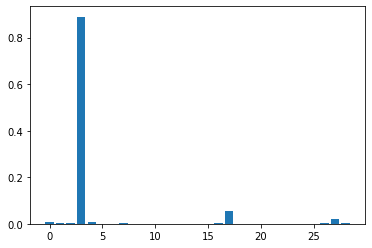

In [33]:
importance = clf.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
print(X.columns[3], X.columns[17])

BORROWER_CREDIT_SCORE VETERAN_Y


BORROWER_CREDIT_SCORE and VETERAN_Y has much higher impotance than other features. <br>
So we generate synthetic features based on the above 2 features in the feature engineering section.

## SVM

In [35]:
# Transform features into the same scale
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = MinMaxScaler()

X_train_scaled[['AGE','SCHOOLING','BORROWER_CREDIT_SCORE','INITIAL_RATE']] = scaler.fit_transform(X_train_scaled[['AGE','SCHOOLING','BORROWER_CREDIT_SCORE','INITIAL_RATE']])
X_test_scaled[['AGE','SCHOOLING','BORROWER_CREDIT_SCORE','INITIAL_RATE']] = scaler.fit_transform(X_test_scaled[['AGE','SCHOOLING','BORROWER_CREDIT_SCORE','INITIAL_RATE']])

In [37]:
start_svm = time.time()
parameters = {'C':[0.1, 1 , 10, 100],'gamma':['scale','auto']}
clf = GridSearchCV(svm.SVC(random_state=1, probability = True),parameters,scoring='f1_weighted',cv=5,n_jobs=-1)
clf.fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_svm))

--- 2572.7962543964386 seconds ---


In [38]:
clf.cv_results_['mean_test_score']

array([0.86080937, 0.85835411, 0.86080937, 0.83347163, 0.86080937,
       0.73301329, 0.86080937, 0.40788967])

In [42]:
# SVM
# Decision Tree
SVMclf = svm.SVC(C=100,gamma='scale',probability = True).fit(X_train_scaled, y_train)
y_pred_SVM = SVMclf.predict(X_test_scaled)

In [43]:
print(metrics.classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      6391
           1       1.00      0.70      0.83      5219

    accuracy                           0.87     11610
   macro avg       0.90      0.85      0.86     11610
weighted avg       0.89      0.87      0.86     11610



In [44]:
#threshold modification
y_myprediction = (SVMclf.predict_proba(X_test) >= 0.2).astype(int)
y_myprediction = y_myprediction[:,1]
print(metrics.classification_report(y_test,y_myprediction))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      6391
           1       1.00      0.70      0.83      5219

    accuracy                           0.87     11610
   macro avg       0.90      0.85      0.86     11610
weighted avg       0.89      0.87      0.86     11610



In [61]:
#threshold modification
y_myprediction = (SVMclf.predict_proba(X_test) >= 0.19).astype(int)
y_myprediction = y_myprediction[:,1]
print(metrics.classification_report(y_test,y_myprediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6391
           1       0.45      1.00      0.62      5219

    accuracy                           0.45     11610
   macro avg       0.22      0.50      0.31     11610
weighted avg       0.20      0.45      0.28     11610



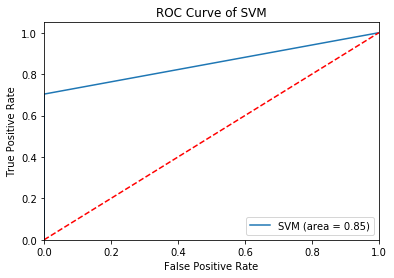

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SVM, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % metrics.roc_auc_score(y_test, y_pred_SVM))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM')
plt.legend(loc="lower right")
plt.show()

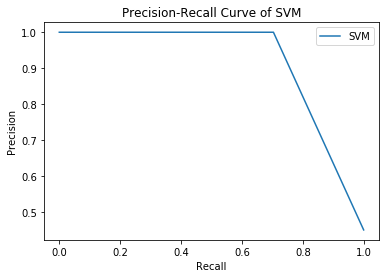

In [47]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_SVM)
plt.figure()
plt.plot(recall, precision, label="SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve of SVM")
plt.legend()
plt.show()

## Logistic Regression

In [48]:
start_lr = time.time()
parameters = {'C':[0.1, 1 , 10, 50, 100],'penalty':['l1','l2','none']}
clf = GridSearchCV(LogisticRegression(random_state=1),parameters,scoring='f1_weighted',cv=10,n_jobs=-1)
clf.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_lr))

--- 8.610162496566772 seconds ---


In [49]:
clf.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
clf.cv_results_['mean_test_score']

array([       nan, 0.86098068, 0.86098068,        nan, 0.86098068,
       0.86098068,        nan, 0.86098068, 0.86098068,        nan,
       0.86098068, 0.86098068,        nan, 0.86098068, 0.86098068])

In [51]:
LRclf = LogisticRegression(C=0.1,penalty='l2').fit(X_train, y_train)
y_pred_LR = LRclf.predict(X_test)

In [52]:
print(metrics.classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      6391
           1       1.00      0.70      0.83      5219

    accuracy                           0.87     11610
   macro avg       0.90      0.85      0.86     11610
weighted avg       0.89      0.87      0.86     11610



In [53]:
#threshold modification
y_myprediction = (LRclf.predict_proba(X_test) >= 0.2).astype(int)
y_myprediction = y_myprediction[:,1]
print(metrics.classification_report(y_test,y_myprediction))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67      6391
           1       0.62      0.87      0.72      5219

    accuracy                           0.70     11610
   macro avg       0.73      0.72      0.70     11610
weighted avg       0.74      0.70      0.70     11610



In [54]:
y_myprediction = (LRclf.predict_proba(X_test) >= 0.1).astype(int)
y_myprediction = y_myprediction[:,1]
print(metrics.classification_report(y_test,y_myprediction))

              precision    recall  f1-score   support

           0       0.88      0.11      0.19      6391
           1       0.47      0.98      0.64      5219

    accuracy                           0.50     11610
   macro avg       0.68      0.54      0.41     11610
weighted avg       0.70      0.50      0.39     11610



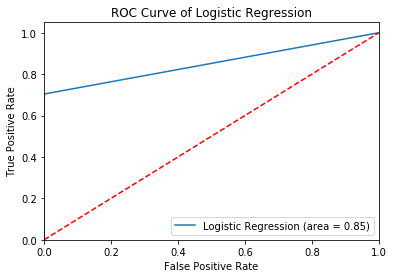

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_LR, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % metrics.roc_auc_score(y_test, y_pred_LR))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

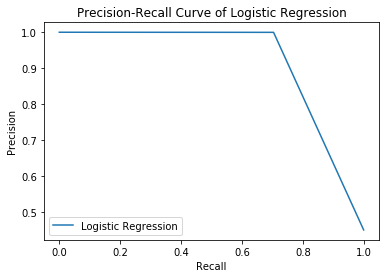

In [56]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_LR)
plt.figure()
plt.plot(recall, precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve of Logistic Regression")
plt.legend()
plt.show()